# Dataset #1

Step #1 EDA
- Detect issues such as missing values, duplicates, or inconsistencies

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv("program1.csv")
print(df)

    year           state state_abbr  percent_yes
0   2023         Alabama         AL         22.6
1   2023          Alaska         AK         19.5
2   2023         Arizona         AZ         18.0
3   2023        Arkansas         AR         24.2
4   2023      California         CA         17.0
5   2023        Colorado         CO         21.4
6   2023     Connecticut         CT         18.8
7   2023        Delaware         DE         20.1
8   2023         Florida         FL         16.3
9   2023         Georgia         GA         17.7
10  2023          Hawaii         HI         13.9
11  2023           Idaho         ID         22.9
12  2023        Illinois         IL         18.1
13  2023         Indiana         IN         24.1
14  2023            Iowa         IA         19.2
15  2023          Kansas         KS         21.1
16  2023       Louisiana         LA         25.7
17  2023           Maine         ME         25.8
18  2023        Maryland         MD         17.4
19  2023   Massachus

In [37]:
df.shape

(48, 4)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         48 non-null     int64  
 1   state        48 non-null     object 
 2   state_abbr   48 non-null     object 
 3   percent_yes  48 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


In [39]:
print(f"The number of rows= {df.shape[0]}")
print(f"The number of columns= {df.shape[1]}")

The number of rows= 48
The number of columns= 4


In [40]:
df.columns

Index(['year', 'state', 'state_abbr', 'percent_yes'], dtype='object')

In [41]:
#display the columns
df.columns.to_list()

['year', 'state', 'state_abbr', 'percent_yes']

In [42]:
# Data Types
df.dtypes

year             int64
state           object
state_abbr      object
percent_yes    float64
dtype: object

In [43]:
#Using iloc list the values for row 20,30 and 48

df.iloc[[20,30,47]]

,year,state,state_abbr,percent_yes
20,2023,Michigan,MI,24.1
30,2023,New York,NY,16.4
47,2023,Wyoming,WY,21.1


In [44]:
# Summary statistics for numeric columns
df.describe()

df.describe(percentiles=[.1, .25, .5, .75, .9])

,year,percent_yes
count,48.0,48.000000
mean,2023.0,21.639583
std,0.0,3.543933
min,2023.0,13.900000
10%,2023.0,17.280000
25%,2023.0,19.100000
50%,2023.0,22.150000
75%,2023.0,24.100000
90%,2023.0,25.800000
max,2023.0,31.200000


In [45]:
# Summary statistics for categorical columns

df.describe(include='object')

,state,state_abbr
count,48,48
unique,48,48
top,Alabama,AL
freq,1,1


In [46]:
# Univariate Analysis — Numerical
print('Year Summary:\n ', df['year'].describe())


Year Summary:
  count      48.0
mean     2023.0
std         0.0
min      2023.0
25%      2023.0
50%      2023.0
75%      2023.0
max      2023.0
Name: year, dtype: float64


In [47]:
# Univariate Analysis — Numerical
print('Percent yes Summary:\n ', df['percent_yes'].describe())

Percent yes Summary:
  count    48.000000
mean     21.639583
std       3.543933
min      13.900000
25%      19.100000
50%      22.150000
75%      24.100000
max      31.200000
Name: percent_yes, dtype: float64


In [48]:
# Univariate Analysis — Categorical
print('State Summary:\n ', df['state'].describe())

State Summary:
  count          48
unique         48
top       Alabama
freq            1
Name: state, dtype: object


In [49]:
# Univariate Analysis — Categorical
print('State Abbreviation Summary:\n ', df['state_abbr'].describe())

State Abbreviation Summary:
  count     48
unique    48
top       AL
freq       1
Name: state_abbr, dtype: object


In [50]:
# Missing values summary

df.isnull().sum()

year           0
state          0
state_abbr     0
percent_yes    0
dtype: int64

In [51]:
# Drop duplicates if any

df.drop_duplicates(inplace=True)


In [52]:
# Fill missing numeric values with median

df['percent_yes'].fillna(df['percent_yes'].median(), inplace=True)

In [53]:
df.isnull().sum()

year           0
state          0
state_abbr     0
percent_yes    0
dtype: int64

In [54]:
# Normalize text data
df['state']= df['state'].str.lower()

In [55]:
# Normalize text data
df['state_abbr']= df['state_abbr'].str.lower()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         48 non-null     int64  
 1   state        48 non-null     object 
 2   state_abbr   48 non-null     object 
 3   percent_yes  48 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


In [57]:
#missing-value percentage check — more intuitive for EDA reports
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

year           0.0
state          0.0
state_abbr     0.0
percent_yes    0.0
dtype: float64

In [58]:
#Handling for incorrect data types
#Example: Convert 'percent_yes' to float if loaded as string
df['percent_yes']=df['percent_yes'].astype(float)
df

,year,state,state_abbr,percent_yes
0,2023,alabama,al,22.6
1,2023,alaska,ak,19.5
2,2023,arizona,az,18.0
3,2023,arkansas,ar,24.2
4,2023,california,ca,17.0
5,2023,colorado,co,21.4
6,2023,connecticut,ct,18.8
7,2023,delaware,de,20.1
8,2023,florida,fl,16.3
9,2023,georgia,ga,17.7


# Summary statistics review

In [59]:
# Numerical summaries
print("Mean percent_yes:", df['percent_yes'].mean())
print("Std of percent_yes:",df['percent_yes'].std() )
print("Min & Max percent_yes:",df['percent_yes'].min(), df['percent_yes'].max() )

# Categorical summaries
print("\nState counts:")
print(df['state_abbr'].value_counts())


Mean percent_yes: 21.63958333333333
Std of percent_yes: 3.5439333589222963
Min & Max percent_yes: 13.9 31.2

State counts:
state_abbr
al    1
ak    1
nv    1
nh    1
nj    1
nm    1
ny    1
nc    1
nd    1
oh    1
ok    1
or    1
ri    1
sc    1
sd    1
tn    1
tx    1
ut    1
vt    1
va    1
wa    1
wv    1
wi    1
ne    1
mt    1
mo    1
id    1
az    1
ar    1
ca    1
co    1
ct    1
de    1
fl    1
ga    1
hi    1
il    1
ms    1
in    1
ia    1
ks    1
la    1
me    1
md    1
ma    1
mi    1
mn    1
wy    1
Name: count, dtype: int64


In [60]:
#unique value counts and mode detection
print("\nUnique value counts per column:")
print(df.nunique())


Unique value counts per column:
year            1
state          48
state_abbr     48
percent_yes    37
dtype: int64


# Exploring relationships

In [61]:
print("Mean percent_yes by State:")
print(df.groupby('state')['percent_yes'].mean())

print("\nMean percent_yes by State Abbreviation:")
print(df.groupby('state_abbr')['percent_yes'].mean())

print("\nMean percent_yes by Year:")
print(df.groupby('year')['percent_yes'].mean())

print("\nCorrelation matrix (numeric columns only):")
print(df.corr(numeric_only=True))

Mean percent_yes by State:
state
alabama           22.6
alaska            19.5
arizona           18.0
arkansas          24.2
california        17.0
colorado          21.4
connecticut       18.8
delaware          20.1
florida           16.3
georgia           17.7
hawaii            13.9
idaho             22.9
illinois          18.1
indiana           24.1
iowa              19.2
kansas            21.1
louisiana         25.7
maine             25.8
maryland          17.4
massachusetts     22.4
michigan          24.1
minnesota         23.1
mississippi       18.1
missouri          23.1
montana           24.4
nebraska          17.9
nevada            20.7
new hampshire     22.0
new jersey        13.9
new mexico        23.0
new york          16.4
north carolina    23.1
north dakota      22.3
ohio              25.0
oklahoma          25.0
oregon            25.8
rhode island      21.7
south carolina    21.9
south dakota      23.1
tennessee         27.3
texas             19.7
utah              26.0
v

In [62]:
print("\nAverage percent_yes by State:\n")
print(df.groupby('state')['percent_yes'].mean())



Average percent_yes by State:

state
alabama           22.6
alaska            19.5
arizona           18.0
arkansas          24.2
california        17.0
colorado          21.4
connecticut       18.8
delaware          20.1
florida           16.3
georgia           17.7
hawaii            13.9
idaho             22.9
illinois          18.1
indiana           24.1
iowa              19.2
kansas            21.1
louisiana         25.7
maine             25.8
maryland          17.4
massachusetts     22.4
michigan          24.1
minnesota         23.1
mississippi       18.1
missouri          23.1
montana           24.4
nebraska          17.9
nevada            20.7
new hampshire     22.0
new jersey        13.9
new mexico        23.0
new york          16.4
north carolina    23.1
north dakota      22.3
ohio              25.0
oklahoma          25.0
oregon            25.8
rhode island      21.7
south carolina    21.9
south dakota      23.1
tennessee         27.3
texas             19.7
utah              2

In [63]:
# Using IQR method
Q1 = df['percent_yes'].quantile(0.25)
Q3 = df['percent_yes'].quantile(0.75)
IQR = Q3 - Q1

outliers =df[(df['percent_yes']<(Q1-1.5*IQR))| (df['percent_yes']>(Q3+1.5*IQR))]
print("Number of outliers in percent_yes:", outliers.shape[0])

# Using Z-Score method
from scipy import stats
z = stats.zscore(df['percent_yes'])
print("Potential outliers (Z > 3):", df[abs(z) > 3].shape[0])

Number of outliers in percent_yes: 0
Potential outliers (Z > 3): 0


# Data Visualization

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [66]:
df=pd.read_csv("program1.csv")

# Display the first few rows to understand the structure
df.head()


,year,state,state_abbr,percent_yes
0,2023,Alabama,AL,22.6
1,2023,Alaska,AK,19.5
2,2023,Arizona,AZ,18.0
3,2023,Arkansas,AR,24.2
4,2023,California,CA,17.0


# Bar Chart

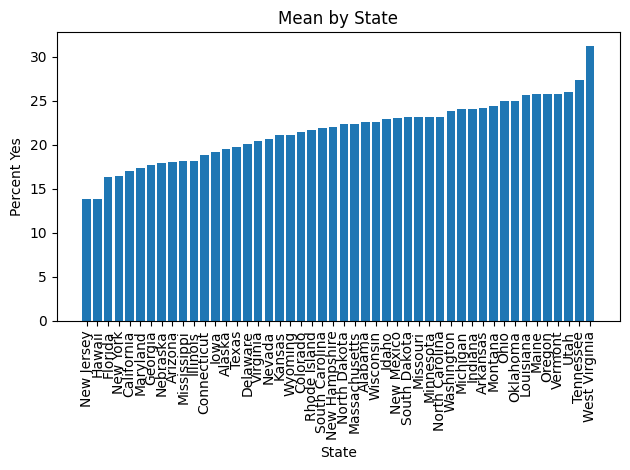

In [70]:
import matplotlib.pyplot as plt

state_means = df.groupby("state")["percent_yes"].mean().sort_values()

plt.bar(state_means.index, state_means.values)
plt.xticks(rotation=90)
plt.title("Mean by State")
plt.xlabel("State")
plt.ylabel("Percent Yes")
plt.tight_layout()
plt.show()

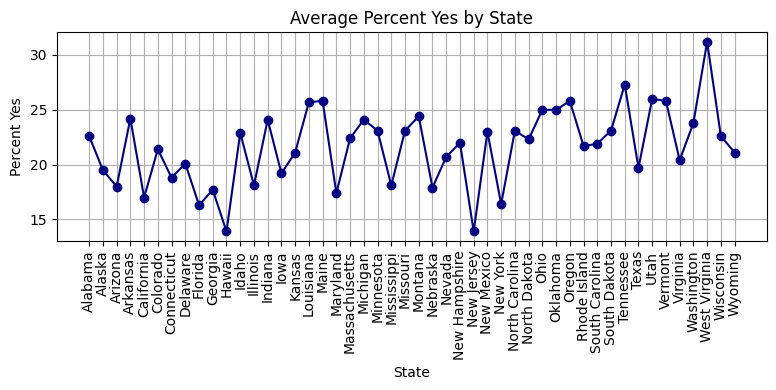

In [71]:
avg_state = df.groupby("state")["percent_yes"].mean()

plt.figure(figsize=(8,4))
plt.plot(avg_state.index, avg_state.values, marker='o', linestyle='-', color='navy')
plt.title("Average Percent Yes by State")
plt.xlabel("State")
plt.ylabel("Percent Yes")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

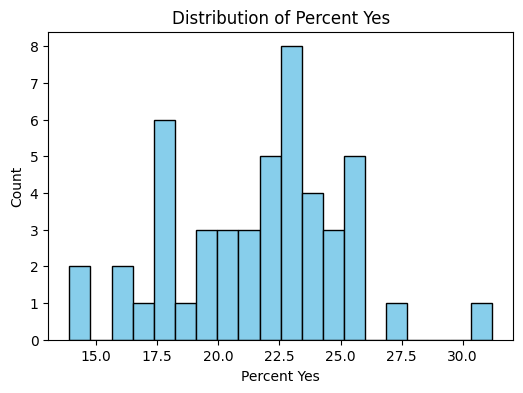

In [72]:
plt.figure(figsize=(6,4))
plt.hist(df['percent_yes'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Percent Yes")
plt.xlabel("Percent Yes")
plt.ylabel("Count")
plt.show()